<font color="darkgreen">
# Lecture 1. Mathematical Building Blocks of Neural Networks

## 1.1 MNIST data 

![image.png](figures/mnist.png)

- 딥러닝의 "Hellow world" 
- 흑백 손글씨 숫자 이미지($28\times 28$ 픽셀)를 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 6만개 training set, 1 만개 test set으로 구성  

In [1]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


#### Training set

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Test set

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

---
### Workflow


#### (1) Network architecture

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

- Fully connected layer 두 개가 연결된 모형을 구축
- 마지막 layer는 10개의 확률 점수가 들어있는 배열을 반환하는 softmax activation을 사용하여 0-9의 숫자 클래스에 들어갈 확률을 예측 

#### (2) Compilation

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

- `loss function`:  모형의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 만들어줌 
- `optimizer`: input data를 기반으로  loss function을 최소화 시키도록 weight를 업데이트하는 메커니즘 
- `metrics`: training/test 과정을 모니터링할 지표 

#### (3) Preparing the image data and the labels

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

- 데이터를 네트워크에 맞는 크기로 바꿈 
- 모든 값을 0과 1사이의 값으로 변환 

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- 레이블을 범주형으로 인코딩(one-hot encoding)

#### (4) Training the model

In [14]:
network.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0079 - acc: 0.9978
Epoch 2/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0061 - acc: 0.9983
Epoch 3/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0049 - acc: 0.9986
Epoch 4/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0039 - acc: 0.9989
Epoch 5/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0032 - acc: 0.9991
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0025 - acc: 0.9994
Epoch 7/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0020 - acc: 0.9996
Epoch 8/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0016 - acc: 0.9996
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0015 - acc: 0.9996
Epoch 10/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0012 - a

- 훈련하는 동안 loss와 accuracy가 출력됨 
- 60000개의 데이터셋을 총 5번 사용하는 만큼(epoch=5) 훈련을 지속 

#### (5) Prediction for test set

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 46us/step


In [16]:
print('test_acc:', test_acc)

test_acc: 0.9844


- Test set에 대한 accuracy가 0.9799로 training set에 대한 accuracy보다 약간 낮음 (overfitting)

## 1.2 Data representations for neural networks

- Tensor: 데이터를 위한 컨테이나
- 행렬의 일반화된 형태 
- 차원을 axis라고 부름 

#### Scalar (0D tensor)
- 하나의 숫자만 담고 있는 tensor

In [18]:
import numpy as np
x=np.array(12)
x

array(12)

In [19]:
x.ndim

0

#### Vectors (1D tensor)
- 하나의 axis를 가지는 벡터 

In [21]:
x=np.array([12,3,6,14,7])
x.ndim

1

- `x`는 5-dimensional vector (5D tensor가 아님)

#### Matrices (2D tensors)
- 2개의 axis가 있음: row, column



In [25]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

- 1st axis: row
- 2nd axis: column 
- 1st row = `[5, 78, 2, 34, 0]`
- 1st column = `[5,6,7]`

#### 3D tensors and higher-dimensional tensors
- 행렬들을 모아 하나의 array로 만들면 직육면체의 3D tensor가 만들어짐 

In [24]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

#### Key attributes
- rank(axis의 개수)
    - 3D tensor의 rank는 3
    - 2D tensor의 rank는 2
    - `ndim` 속성에 저장 
- shape
    - Tensor의 각 axis를 따라 얼마나 많은 차원이 있는지를 나타낸 tuple 
    - 위의 2D tensor의 shape은 (3,5)
    - 위의 3D tensor의 shape은 (3,3,5)
- data type
    - Tensor에 포함된 데이터의 타입
    - float32, uint8, float64 등
    - `dtype` 속성에 저장
    

In [31]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<font color="blue">_TO DO: MNIST 데이터_
    
1. train_images의 rank는?
2. train_images의 shape은?
3. train_images의 data type은?


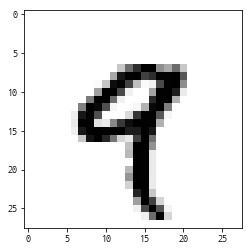

In [34]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### Examples of tensor data
- Vector data—2D tensors of shape (samples, features)
    - 사람의 나이, 우편번호, 소득으로 구성된 인구통계 데이터. 10만명이 포함된 데이터 셋이라면 (100000,3) 
    - 공통 단어 2만 개로 이루어진 텍스트 문서 500개가 있다. 하나의 문서를 각 단어가 등장한 횟수로 표현된 벡터로 나타낸다면 (500,20000)
- Timeseries data or sequence data—3D tensors of shape (samples, timesteps, features)
    ![image.png](figures/timeseries.PNG)
    
    - 관례적으로 시간은 axis=1인 축으로 표현 
    - 주식가격 데이터셋: 1분 마다 3개의 feature(현재 주식가격, 지난 1분 동안 최고 가격, 최저 가격)를 저장. 1분마다 3-dimensional vector 생성. 하루의 거래는 (390,3) 크기의 2D tensor로 저장. 250일치 데이터는 (250,390,3) 크기의 3D tensor로 저장
    - 트윗 데이터셋: 각 트윗은 128개의 알파벳/문자로 구성된 280개의 문자 시퀀스. 하나의 트윗은 (280,128) 크기의 2D tensor. 100만개의 트윗이 포함된 데이터는 (1000000,280,128) 크기의 3D tensor
- Images—4D tensors of shape (samples, height, width, channels) 

    ![image.png](figures/4d_image.PNG)
    -  하나의 이미지는 전형적으로 높이, 너비, 컬러채널의 3-dimensional data. $256\times 256$ 픽셀의 이미지라면 (256, 256, 3) 크기의 3D tensor
    - 128개의 이미지가 포함된 batch는 (128, 256, 256, 3) 크기의 4D tensor로 표현 
    - 만일 흑백 이미지라면 (128, 256, 256, 1)

- Video—5D tensors of shape (samples, frames, height, width, channels)
    - 비디오 데이터는 이미지의 연속 
    - 60초 짜리 $144 \times 256$ 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240 프레임을 생성. 하나의 비디오 클립은 (240, 144, 256, 3)
    - 비디오 클립을 4개 포함한 batch는 (4, 240, 144, 256, 3) 크기의 5D tensor

<font color="blue">_TO DO: _
    
영화 리뷰 25000개가 있다. 각 리뷰는 200개의 단어로 이루어져 있다. 
- 가장 자주 등장하는 10000개의 단어에 대해 각 리뷰에 해당 단어의 포함 유무를 0/1 로 나타낸다. 이 데이터의  shape은 무엇인가? 
- 가장 자주 등장하는 10000개에 대해 각 단어를 one-hot vector로 표현하여 하나의 문장을 matrix로 표현한다. 이 데이터의 shape은 무엇인가? 




__References__


- [Deep Learning with Python, François Chollet,](https://www.manning.com/books/deep-learning-with-python)